In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import operator
from scipy.optimize import minimize
import math

In [23]:
def gen_dx(mu_real,sig_real,dt,N):
    N=np.int64(N)
    dW=np.sqrt(dt)*np.random.normal(0, 1, N)
    e= mu_real*dt+ sig_real*dW
    return(e)

In [24]:
def liklihood(param,data, disc):
    L=0
    e=data
    N,dt=disc;
    N=np.int64(N)
    mu,sig =param;
    for i in range(0,N):
        L = L  - (e[i]-mu*dt )**2/(2*dt*sig**2) -0.5*np.log(2*math.pi*sig**2*dt)
    return(-1*L)

In [25]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='slope='+str(slope))

In [26]:
def covergence_test(disc ,param_real, param_initial):
    
    N,dt=disc;
    mu_real,sig_real=param_real
    mu_initial,sig_initial=param_initial
    
    e=gen_dx(mu_real,sig_real,dt,N)
    
    args=(e,disc)
    x0=param_initial
    bnds = ((None, None), (1e-5, None))
    
    min_param=minimize(liklihood,x0,args,bounds=bnds);min_param
    #min_param=minimize(liklihood,x0,args,method='SLSQP',bounds=bnds,\
                   #tol=1e-24,options={  'ftol': 1e-24,  'eps': 1e-12});min_param
    error = np.divide ( abs(min_param.x - param_real),param_real )
    
    return(min_param.x, error)

In [43]:
#varying dt

dt_test=np.array([0.0000001,0.000001,0.00001,0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,10,100,1000,10000,100000,1000000])   #np.arange(0.001,2,0.2)

err_fixedN=np.zeros((len(dt_test),2))
#res1=np.zeros((len(dt_test),2))

param_real_test=np.array([100,10])
param_initial_test= np.array([13,7])

fix_N=1000

for i in range(0,len(dt_test)):
    disc_test=np.array([fix_N,dt_test[i]])
    _,err_fixedN[i,:]=covergence_test(disc_test,param_real_test,param_initial_test)

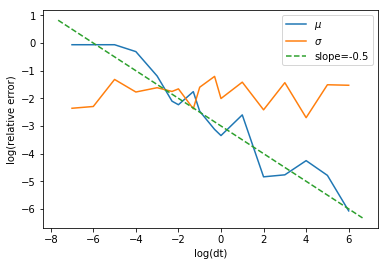

In [44]:
plt.title('')
plt.xlabel('log(dt)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(dt_test),  np.log10(err_fixedN[:,0]), label='$\mu$')
plt.plot(np.log10(dt_test),  np.log10(err_fixedN[:,1]), label='$\sigma$')
abline(-0.5,-3)
plt.legend()
plt.savefig('case12test213.pdf')